# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [12]:
!pip install networkx==2.3

You should consider upgrading via the 'c:\users\ritika\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Using cached networkx-2.3-py2.py3-none-any.whl
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5


In [11]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

AttributeError: partially initialized module 'networkx' has no attribute 'utils' (most likely due to a circular import)

In [3]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

NameError: name 'pd' is not defined

In [4]:
data.head()

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


In [5]:
edges = [tuple(x) for x in data.values.tolist()]

In [6]:
edges[0]

('m1', 'a1')

In [7]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [8]:
A = list(nx.connected_component_subgraphs(B))[0]

In [9]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


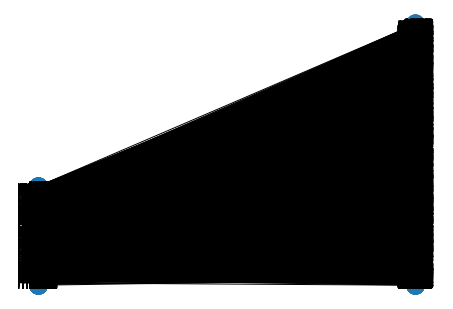

In [64]:
movies_set, actors_set = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(movies_set))
pos.update((node, (2, index)) for index, node in enumerate(actors_set))
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, vector_size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [65]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
# print (node_ids)
print (len(node_ids))

4703


In [16]:
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
print(node_embeddings[0])

[ 0.09660997  0.68906367 -2.1005282  -1.0206617   2.5086398   0.78589445
  0.44018912  1.12301    -0.614031    0.7182274  -0.63423485 -1.3102505
 -2.4988368   0.5653235  -1.1273873  -0.04290412  1.057714    1.530258
 -1.090011   -0.2807436   0.11820492 -0.5227294   1.0694852   0.4945306
  0.2532821   1.3474115  -0.89191484  1.535934   -0.9367508   0.7119205
 -0.2589973  -0.2114229   0.06106957  0.1466147  -0.85868996  0.4299854
  2.5309913  -1.7171618   1.9373685  -0.44148207 -1.2847213   0.5147651
 -0.1993592  -1.1320881  -0.37073797 -0.89950305  1.2753872   0.64011174
 -0.647503   -0.7865685  -1.9695448   0.3100548   1.4997499   1.2008928
  0.27279386 -0.6298189   1.5905507  -0.9728873   2.5433195  -0.8320774
  0.34806305  0.5533095   0.23421596  0.9693747   0.02590598  2.3539968
 -0.22686894  1.7702924  -1.2085605  -2.2453852   2.2137723   0.02862522
  0.03757376 -0.22133769 -1.3734723  -0.2171886  -0.9945101  -0.47050825
 -2.1726313   0.05626667  2.616751    1.8372068   0.10914759 

In [17]:
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]
print (node_targets[:15])

['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor', 'actor']


In [66]:
# for index, embed in enumerate(node_embeddings):
#     print (index)
#     print (embed)
#     break

In [19]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes = []
    movie_nodes = []
    actor_embeddings = []
    movie_embeddings =[]
    
    for index,ids in enumerate(node_ids):
        if node_targets[index]=='actor':
            actor_nodes.append(ids)
        if node_targets[index]=='movie':
            movie_nodes.append(ids)
    
    for index, embed in enumerate(node_embeddings):
        if node_targets[index]=='actor':
            actor_embeddings.append(embed)
        if node_targets[index]=='movie':
            movie_embeddings.append(embed)

    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


<font color='cyan'>Grader function - 1</font>

In [20]:
actor_nodes = data_split(node_ids,node_targets,node_embeddings)[0]
movie_nodes = data_split(node_ids,node_targets,node_embeddings)[1]
actor_embeddings = data_split(node_ids,node_targets,node_embeddings)[2]
movie_embeddings = data_split(node_ids,node_targets,node_embeddings)[3]

In [21]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [22]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [23]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    num= max([len(x) for x in list(nx.connected_components(graph))])
        
    cost1 = (1/number_of_clusters)*(num/graph.number_of_nodes())
    return cost1

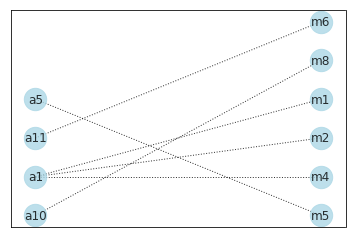

In [24]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [25]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [26]:
# degree = graded_graph.degree
# for deg in degree:
#     print (deg)

In [27]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    degree = graph.degree
    nodes = list(graph.nodes())
    unique_graph_nodes = []
    for i in nodes:
        if i not in unique_graph_nodes:
            unique_graph_nodes.append(i)
    summation = 0
    for deg in degree:
        if 'a' in deg[0]:
            summation += deg[1]
    movie_nodes = 0
    for node in unique_graph_nodes:
        if 'm' in node:
            movie_nodes += 1
    cost2= (1/number_of_clusters)*summation/movie_nodes
    
    return cost2

<font color='cyan'>Grader function - 4</font>

In [28]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [ ]:
# actor_matrix = np.array(actor_embeddings)
# actor_matrix.shape

In [63]:
from tqdm import tqdm
actor_cost = []
clusters_list = [3, 5, 10, 30, 50, 100, 200, 500]
for number_of_clusters in tqdm(clusters_list) :
    kmeans = KMeans(n_clusters=number_of_clusters,random_state=0)
    kmeans.fit(actor_embeddings)
    actor_labels = kmeans.labels_
    all_clusters_list = []
    unique_labels = np.unique(actor_labels)
    actor_dict = dict(zip(actor_nodes,actor_labels))
    for i in unique_labels:
        cluster_list = []
        for node,label in actor_dict.items():
            if label == i:
                cluster_list.append(node)
            all_clusters_list.append(cluster_list)
#     print ("all_clusters_list length :",len(all_clusters_list))        
#     print ('Done 1')
            
    cost_1 = 0
    cost_2 = 0
    
    for my_cluster in tqdm(all_clusters_list):
        G = nx.Graph()
#         print ("my_cluster length: ",len(my_cluster))
#         print ('Done 2')
        for actor_node in my_cluster:
#             print ("actor_node length:",len(actor_node))
#             print (actor_node)
            sub_graph1 = nx.ego_graph(A,actor_node)
            G.add_nodes_from(sub_graph1.nodes)
            G.add_edges_from(sub_graph1.edges)
#             print ('Done 3')
        cost_1 = cost_1 + cost1(G,number_of_clusters)
#         print ("Calculated Cost 1!")
        cost_2 = cost_2 + cost2(G,number_of_clusters)
#         print ("Calculated Cost 2!")
    print  ("cost_1*cost_2: ",cost_1*cost_2)
    actor_cost.append(cost_1*cost_2)
    

  0%|          | 0/8 [13:56<?, ?it/s]


KeyboardInterrupt: 

In [31]:
best_n_clusters = clusters_list[actor_cost.index(max(actor_cost))]

In [32]:
kmeans_a = KMeans(n_clusters = best_n_clusters)
kmeans_a.fit(actor_matrix)

KMeans(n_clusters=3)

<font color='blue'>Displaying similar actor clusters</font>

In [33]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_matrix)

In [34]:
actor_y_predict = kmeans_a.predict(actor_matrix)

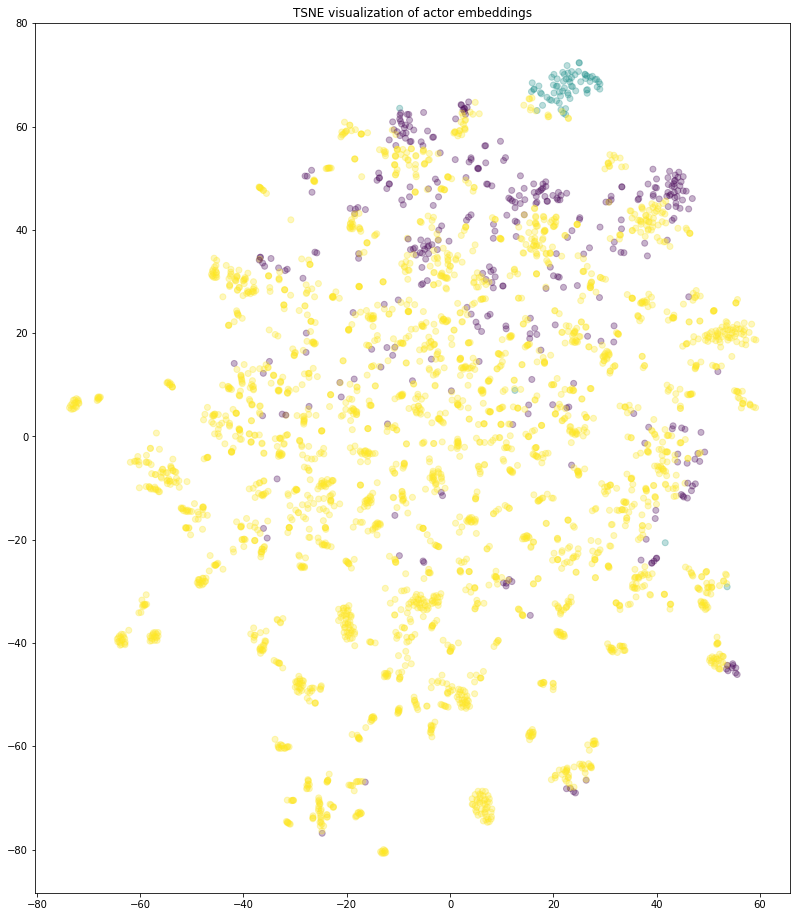

In [35]:
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")

plt.scatter(actor_embeddings_2d[:,0], 
            actor_embeddings_2d[:,1], 
            c=actor_y_predict, alpha=0.3)

plt.title('{} visualization of actor embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [36]:
# movie_matrix = np.array(movie_embeddings)
# movie_matrix.shape

(1292, 128)

In [62]:
movie_cost = []
clusters_list = [3, 5, 10, 30, 50, 100, 200, 500]
for number_of_clusters in tqdm(clusters_list) :
    kmeans = KMeans(n_clusters=number_of_clusters,random_state=0)
    kmeans.fit(movie_embeddings)
    movie_labels = kmeans.labels_
    all_clusters_list = []
    unique_labels = np.unique(movie_labels)
    movie_dict = dict(zip(movie_nodes,movie_labels))
    for i in unique_labels:
        cluster_list = []
        for node,label in movie_dict.items():
            if label == i:
                cluster_list.append(node)
            all_clusters_list.append(cluster_list)
#     print ("all_clusters_list length :",len(all_clusters_list))        
#     print ('Done 1')
            
    cost_1 = 0
    cost_2 = 0
    
    for my_cluster in tqdm(all_clusters_list):
        G = nx.Graph()
#         print ("my_cluster length: ",len(my_cluster))
#         print ('Done 2')
        for movie_node in my_cluster:
#             print ("actor_node length:",len(actor_node))
#             print (actor_node)
            sub_graph1 = nx.ego_graph(A,movie_node)
            G.add_nodes_from(sub_graph1.nodes)
            G.add_edges_from(sub_graph1.edges)
#             print ('Done 3')
        cost_1 = cost_1 + cost1(G,number_of_clusters)
#         print ("Calculated Cost 1!")
        cost_2 = cost_2 + cost2(G,number_of_clusters)
#         print ("Calculated Cost 2!")
    print  ("cost_1*cost_2: ",cost_1*cost_2)
    movie_cost.append(cost_1*cost_2)

  0%|          | 0/8 [04:59<?, ?it/s]


KeyboardInterrupt: 

In [57]:
best_n_clusters = clusters_list[movie_cost.index(max(movie_cost))]

In [58]:
kmeans_m = KMeans(n_clusters = best_n_clusters)
kmeans_m.fit(movie_matrix)

KMeans(n_clusters=3)

<font color='blue'>Displaying similar movie clusters</font>

In [59]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_matrix)

movie_y_predict = kmeans_m.predict(movie_matrix)


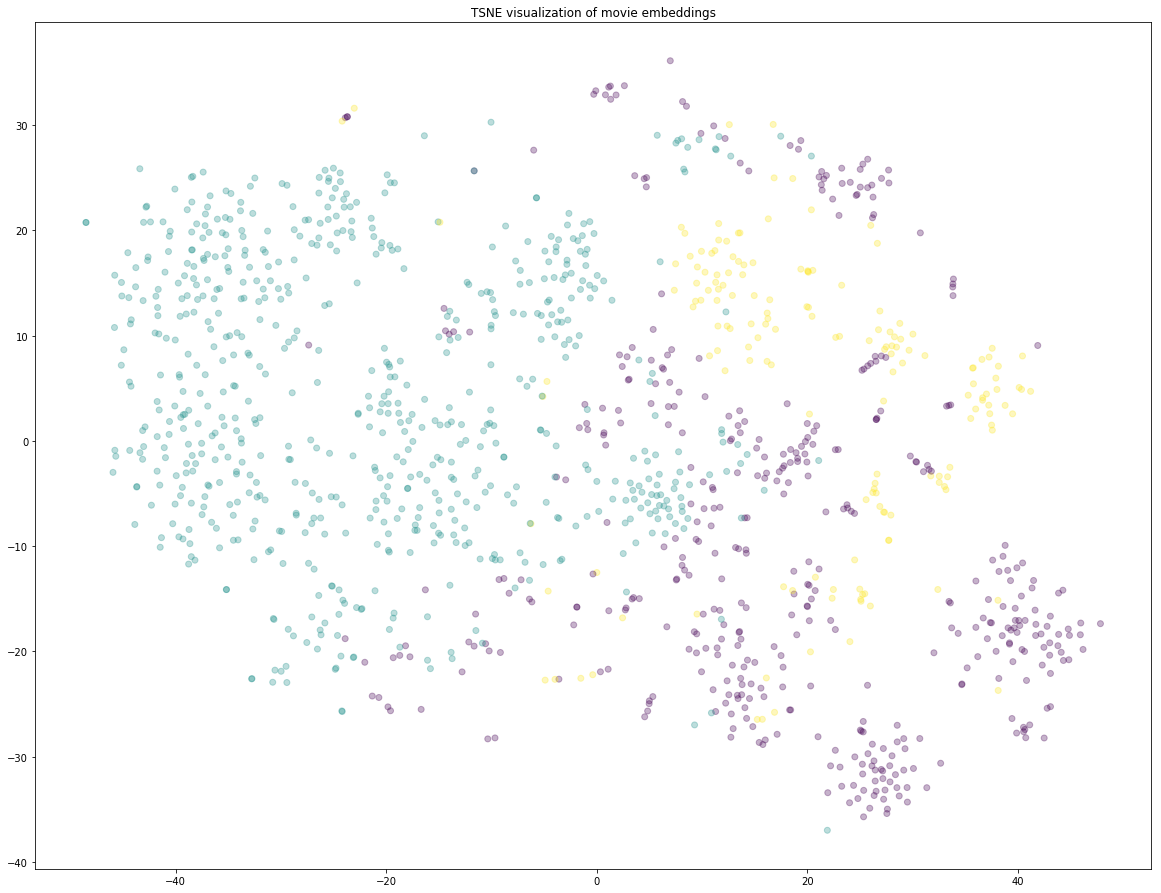

In [60]:
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")

plt.scatter(movie_embeddings_2d[:,0], 
            movie_embeddings_2d[:,1], 
            c=movie_y_predict, alpha=0.3)

plt.title('{} visualization of movie embeddings'.format(transform.__name__))

plt.show()